In [1]:
import pandas as pd

In [2]:
from scipy.stats import chi2_contingency

In [3]:
chessGames = pd.read_csv('Datasets/assignment4.csv', sep=',')

In [4]:
chessGames.columns

Index(['id', 'rated', 'created_at', 'last_move_at', 'turns', 'victory_status',
       'winner', 'increment_code', 'white_id', 'white_rating', 'black_id',
       'black_rating', 'moves', 'opening_eco', 'opening_name', 'opening_ply'],
      dtype='object')

# Categorical columns:
* Rated;
* Victory_status;
* Winner;
* Opening_name.

In [30]:
chessGames.value_counts('rated')

rated
True     16155
False     3903
dtype: int64

It might be interesting to check whether the victory status and the game being rated are correlated, these columns will be compared for correlation.

It is likely that the game being rated partly determines its outcome. Thus our null hypothesis will be that the variables are independent, and our alternative hypothesis will be that they are correlated.

The absolute sizes of the contingency table are not that usefull to us, because we're looking for a difference in the distribution of victory statuses in rated vs unrated games. 
Because there are a lot more rated games compared to unrated games, we'll convert the contingency table to a percentage after unstacking it, all rated games (now spread across victory statuses) together will be 100%, as will all unrated games.

Having done this transform, it is much easier to compare the relative lengths are now shown directly in the bar plot, instead of the absolute numbers.

In [31]:
contingencyTableVictoryStatusOpeningName = chessGames.groupby(['victory_status', 'rated']).size().unstack('rated', fill_value=0)
# Transform the hard values on size between rated and unrated games to percentages
contingencyTableVictoryStatusOpeningNamePercentage = contingencyTableVictoryStatusOpeningName.transform(lambda x: x/sum(x))
contingencyTableVictoryStatusOpeningNamePercentage

rated,False,True
victory_status,,
draw,0.057648,0.042154
mate,0.302075,0.318539
outoftime,0.082244,0.084123
resign,0.558032,0.555184


<AxesSubplot:xlabel='victory_status'>

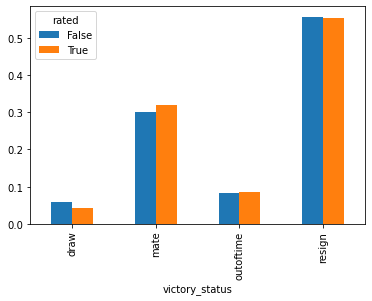

In [24]:
contingencyTableVictoryStatusOpeningNamePercentage.plot.bar()

In [28]:
chi2_contingency(contingencyTableVictoryStatusOpeningNamePercentage)

(0.0028705944213795547,
 0.9999591301929635,
 3,
 array([[0.04990105, 0.04990105],
        [0.31030724, 0.31030724],
        [0.0831835 , 0.0831835 ],
        [0.55660822, 0.55660822]]))

The null hypothesis states that both variables are independent of one another, whereas the alternative hypothesis states that they are dependent.
The p-value is 99.996%, this is a lot higher than a significance of 0.05 or 5%.
The null hypothesis can not be discarded, these variables are independent of each other.